In [11]:
import pandas as pd
data1a = pd.read_csv('/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/cleandata1a.csv')

data1a[["Value"]].describe()

,Value
count,630.000000
mean,34.537254
std,38.067211
min,0.211856
25%,8.962933
50%,21.689714
75%,45.564320
max,219.560846


Time
2019    14.190713
2020    14.991558
2021    15.815873
2022    16.661638
2023    17.526139
2024    18.408037
2025    19.305978
2026    20.218833
2027    21.145476
2028    22.084971
2029    23.036863
2030    24.000722
2031    24.977092
2032    25.965641
2033    26.966224
2034    27.978738
2035    29.003360
2036    30.039738
2037    31.087691
2038    32.147030
2039    33.217568
2040    34.298923
2041    35.390826
2042    36.493203
2043    37.605950
2044    38.728821
2045    39.861560
2046    41.003898
2047    42.155371
2048    43.315662
2049    44.484259
2050    45.660990
2051    46.845424
2052    48.037173
2053    49.235762
2054    50.440719
2055    51.651467
2056    52.867548
2057    54.088356
2058    55.313384
2059    56.541971
2060    57.773511
Name: Value, dtype: float64


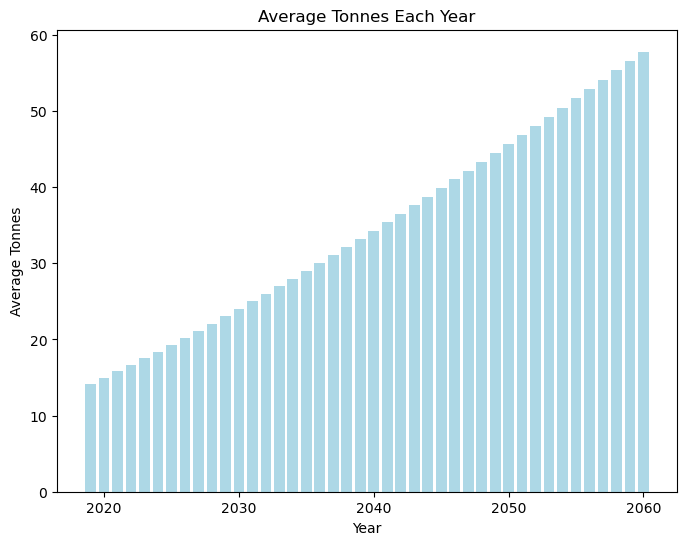

In [16]:
import matplotlib.pyplot as plt
average_tonnes = data1a.groupby("Time")["Value"].mean()
print(average_tonnes)
# Create a bar chart to visualize the average tonnes for each year
plt.figure(figsize=(8, 6))
plt.bar(average_tonnes.index, average_tonnes.values, color='#ADD8E6')
plt.xlabel("Year")
plt.ylabel("Average Tonnes")
plt.title("Average Tonnes Each Year")
plt.show()

Location
Other non-OECD Asia           5219.555210
China                         3171.411114
Other Africa                  2683.444158
Latin America                 2184.368092
OECD EU                       1630.250955
United States                 1517.991740
India                         1431.290918
Middle East & North Africa    1388.940608
OECD Non-EU                    712.730233
Other OECD America             628.464360
OECD Asia                      578.911133
Other Eurasia                  332.924609
Canada                         222.498466
Other EU                        32.281595
OECD Oceania                    23.406731
Name: Value, dtype: float64


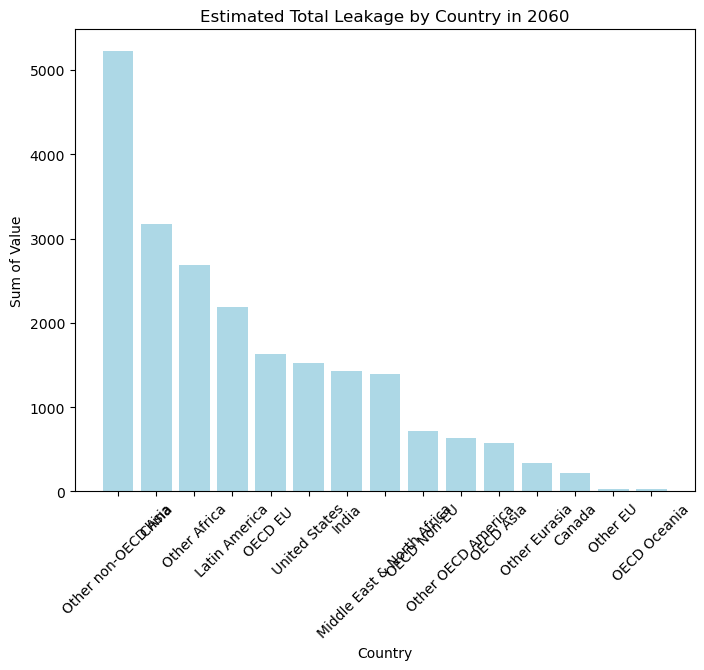

In [13]:
country_sum = data1a.groupby("Location")["Value"].sum()
# Print the sum of values for each country
country_sum = country_sum.sort_values(ascending=False)
print(country_sum)
plt.figure(figsize=(8, 6))
plt.bar(country_sum.index, country_sum.values, color='#ADD8E6')
plt.xlabel("Country")
plt.ylabel("Sum of Value")
plt.title("Estimated Total Leakage by Country in 2060")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


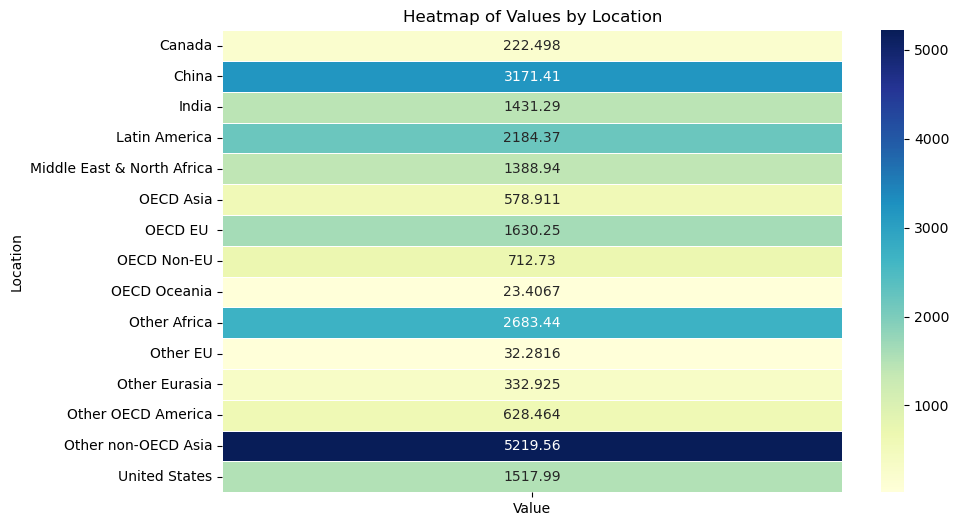

In [14]:
#HeatMap
import seaborn as sns
heatmap_data = data1a.pivot_table(index="Location", values="Value", aggfunc="sum")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='g', cbar=True, linewidths=0.5)
plt.title("Heatmap of Values by Location")

# Show the plot
plt.show()

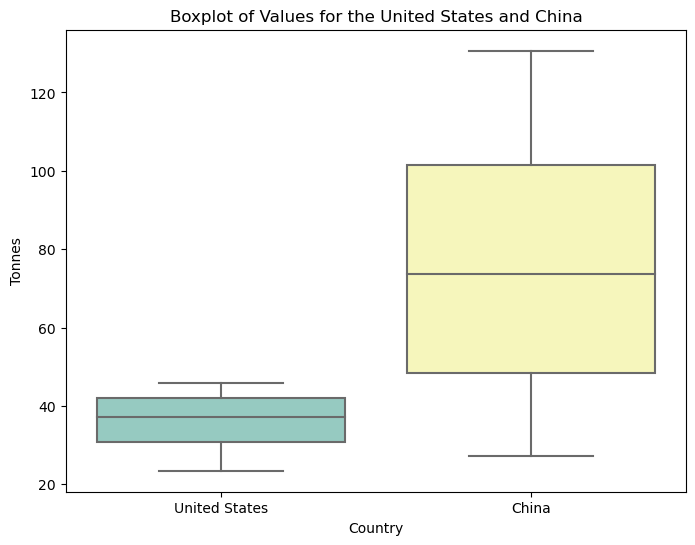

In [15]:
selected_countries = ["United States", "China"]
filtered_df = data1a[data1a["Location"].isin(selected_countries)]

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Location", y="Value", data=filtered_df, palette="Set3")
plt.xlabel("Country")
plt.ylabel("Tonnes")
plt.title("Boxplot of Values for the United States and China")

# Show the plot
plt.show()

In [40]:
correlation_matrix = data1a[["Time", "Value"]].corr()
print(correlation_matrix)

           Time     Value
Time   1.000000  0.341206
Value  0.341206  1.000000


In [47]:
Q1 = data1a['Value'].quantile(0.25)
Q3 = data1a['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data1a[(data1a['Value'] < lower_bound) | (data1a['Value'] > upper_bound)]
print(outliers)
len(outliers)

     Unnamed: 0             Location Water.source  Time       Value
120         205         Other Africa        Ocean  2055  103.514712
121         206         Other Africa        Ocean  2056  106.766738
122         207         Other Africa        Ocean  2057  110.080365
123         208         Other Africa        Ocean  2058  113.455910
124         209         Other Africa        Ocean  2059  116.893767
125         210         Other Africa        Ocean  2060  120.393706
310         605  Other non-OECD Asia        Ocean  2035  101.316394
311         606  Other non-OECD Asia        Ocean  2036  105.610127
312         607  Other non-OECD Asia        Ocean  2037  109.955133
313         608  Other non-OECD Asia        Ocean  2038  114.349970
314         609  Other non-OECD Asia        Ocean  2039  118.794493
315         610  Other non-OECD Asia        Ocean  2040  123.282896
316         611  Other non-OECD Asia        Ocean  2041  127.815092
317         612  Other non-OECD Asia        Ocea

43